In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation

In [2]:
PVC_H=104.5/100
BLACK_H=115/100

In [3]:
# load json data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return [
        (
            (
                t["odom"]["pose"]["pose"]['position']['x'],
                t["odom"]["pose"]["pose"]['position']['y'],
                t["odom"]["pose"]["pose"]['position']['z']
            ),
            (
                t["odom"]["pose"]["pose"]['orientation']['x'],
                t["odom"]["pose"]["pose"]['orientation']['y'],
                t["odom"]["pose"]["pose"]['orientation']['z'],
                t["odom"]["pose"]["pose"]['orientation']['w']
            ),
    
        ) for t in data if t['expmt_flag']
    ]

In [68]:
def get_transform_mat(data):
    pose = data[0]
    rotation = Rotation.from_quat(data[1]).as_dcm()
    
    ret = np.eye(4)
    ret[:3,:3] = rotation
    ret[:3,3] = pose
    print(ret)
    return ret

In [114]:
def get_transformed_data(data_1):
    init_pos = np.array([-0.045, 0.0, 0, 1])
    data0 = [(get_transform_mat(x)@init_pos)[:3] for x in data_1]
    data1 = [x[0] for x in data_1]
    return data0, data1

In [115]:
data_1=load_json('May7Expmt1.json')
data_2=load_json('May7Expmt2.json')
data_3=load_json('May7Expmt3.json')
data_4=load_json('ms_1.json')
data_6=load_json('ms_3.json')

In [116]:
data1, prev_data1 = get_transformed_data(data_1)
data2, prev_data2 = get_transformed_data(data_2)
data3, prev_data3 = get_transformed_data(data_3)
data4, prev_data4 = get_transformed_data(data_4)
# data5, prev_data5 = get_transformed_data(data_5)
data6, prev_data6 = get_transformed_data(data_6)

[[-2.07913578e-02  9.99750173e-01  8.20429690e-03 -3.02106212e-03]
 [-9.97759205e-01 -2.02265796e-02 -6.37765965e-02 -1.99313581e-01]
 [-6.35947185e-02 -9.51191479e-03  9.97930476e-01  1.92887630e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-3.98115521e-02  9.99195020e-01  4.93487674e-03 -1.04429293e-02]
 [-9.97150798e-01 -3.94124404e-02 -6.43190962e-02 -3.83424729e-01]
 [-6.40728250e-02 -7.48145933e-03  9.97917181e-01  2.19076144e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-4.96810678e-02  9.98718768e-01  9.62364710e-03 -1.83883887e-02]
 [-9.96847291e-01 -4.89865282e-02 -6.24163314e-02 -5.82161248e-01]
 [-6.18649325e-02 -1.26942165e-02  9.98003801e-01 -3.74824158e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-0.06492791  0.99783     0.01093902 -0.0295952 ]
 [-0.99585485 -0.06409186 -0.06453954 -0.77012914]
 [-0.06369839 -0.01508409  0.99785519 -0.00114676]
 [ 0.          0.          0.          1

In [117]:
data1

[array([-0.00208545, -0.15441442,  0.00305465]),
 array([-0.00865141, -0.33855294,  0.00310235]),
 array([-0.01615274, -0.53730312,  0.0024091 ]),
 array([-0.02667344, -0.72531568,  0.00171967]),
 array([-0.17070406, -0.82731649,  0.00372292]),
 array([-0.28900435, -0.69394085,  0.00574168]),
 array([-0.20819444, -0.46808996,  0.00268993]),
 array([-0.13717934, -0.56433719,  0.00249638]),
 array([-0.21283727, -0.74941093,  0.00260631]),
 array([-0.29253021, -0.91860754,  0.0030944 ]),
 array([-0.3803655 , -1.09026069,  0.00345684]),
 array([-0.47699659, -1.26509301,  0.00492444])]

In [118]:
prev_data1

[(-0.003021062118932605, -0.19931358098983765, 0.0001928876299643889),
 (-0.010442929342389107, -0.3834247291088104, 0.00021907614427618682),
 (-0.01838838867843151, -0.5821612477302551, -0.0003748241579160094),
 (-0.02959519624710083, -0.7701291441917419, -0.0011467577423900366),
 (-0.2155490219593048, -0.8244122862815857, 0.0013787834905087948),
 (-0.28835153579711914, -0.6490427255630493, 0.0027866584714502096),
 (-0.16402602195739746, -0.4762798547744751, 2.974539529532194e-05),
 (-0.1492641568183899, -0.607599139213562, -0.00021677653421647847),
 (-0.23164506256580353, -0.7902112007141113, 3.6292167351348326e-05),
 (-0.3124358057975769, -0.9588727355003357, 0.000359248835593462),
 (-0.4015037715435028, -1.129913330078125, 0.0010399013990536332),
 (-0.4992305040359497, -1.3041331768035889, 0.0023712434340268373)]

In [119]:
m7e1 = np.array([
    42.2,
    60.1,
    79.5,
    97.6,
    103.8,
    97.1,
    79.9,
    82.4,
    100.7,
    118.3,
    136.6,
    155.5
])/100

In [120]:
m7e2 = np.array([
    42.6,
    61.4,
    80.5,
    98.5,
    102,
    94.9,
    99.6,
    91.8,
    110,
    128.2,
    146.5,
    165.5
])/100.

In [121]:
m7e3 = np.array([
    42.7,
    62.3,
    81.7,
    100.7,
    106.9,
    95.8,
    88.1,
    89.2,
    108.1,
    125.1,
    143.6,
    162.2
])/100.

In [136]:
def plt_exp(data, gt, initial_y, data2=None):
    base_x=data[0][0]
    base_y=data[0][1]
    t1_pos=[base_x,initial_y]
    points=[]
    for idx in range(len(data)):
        x=data[idx][0]
        y=data[idx][1]
        points.append([x,y])
        plt.scatter(x,y, color="blue", s=10)
        plt.text(x, y, str(idx+1), fontsize=10, color="red")
    plt.scatter(t1_pos[0], t1_pos[1], color="red", s=10)
    
    err=[]
    for measuredDist, slamLoc in zip(gt, points):
        dist= ((slamLoc[0]-t1_pos[0])**2+(slamLoc[1]-t1_pos[1])**2)**0.5
        real_dist=(0.05**2+dist**2)**0.5
        # print(f"measuredDist: {measuredDist}, Slamdist: {dist}")
        err.append((measuredDist-real_dist))
    
    if data2 is not None:
        points2=[]
        err2=[]
        for idx in range(len(data2)):
            x=data2[idx][0]
            y=data2[idx][1]#+0.04
            points2.append([x,y])
            plt.scatter(x,y,marker='x', color="red", s=10)
            plt.text(x, y, str(idx+1), fontsize=10, color="red")

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.title("Rover location")
    plt.show()


    plt.plot(range(1,len(err)+1),err, '.')
    plt.ylim([-0.15,0.10])
    plt.xlabel("Exp stop number")
    plt.ylabel("Error")
    plt.grid()
    
    if data2 is not None:

        for measuredDist, slamLoc in zip(gt, points2):
            dist= ((slamLoc[0]-t1_pos[0])**2+(slamLoc[1]-t1_pos[1])**2)**0.5
            real_dist=(0.05**2+dist**2)**0.5
            err2.append((measuredDist-real_dist))
            plt.plot(range(1,len(err2)+1),err2, 'x')


    plt.show()

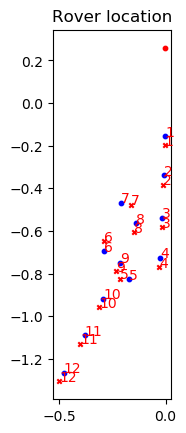

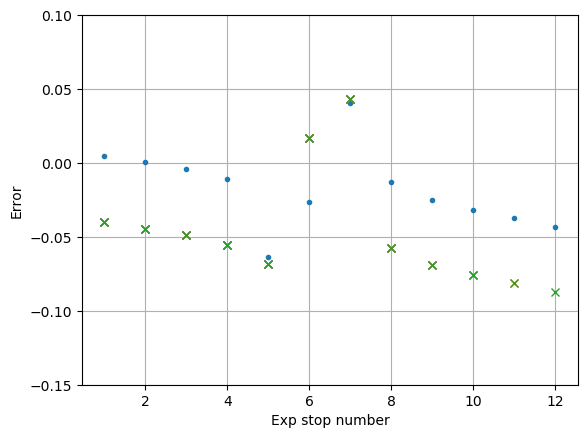

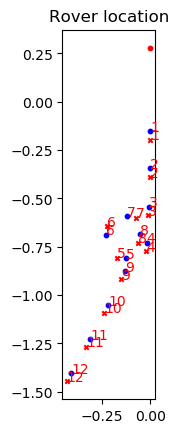

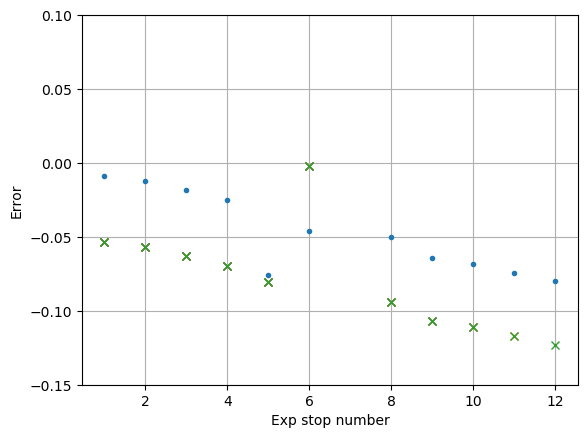

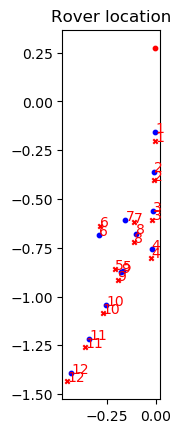

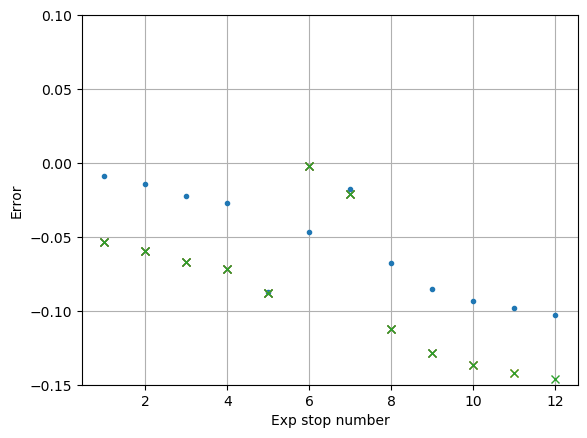

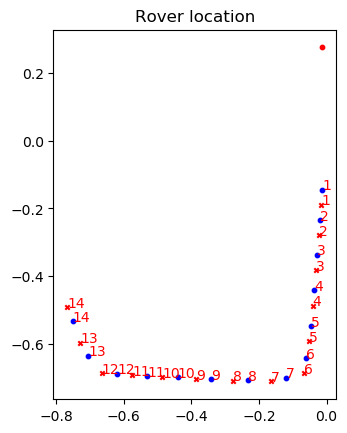

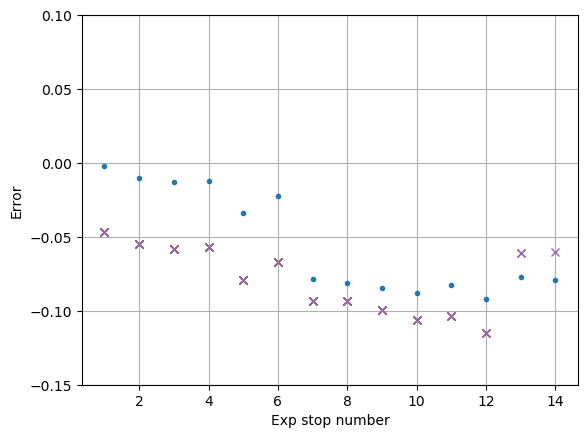

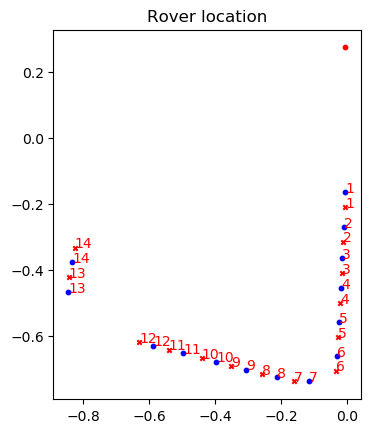

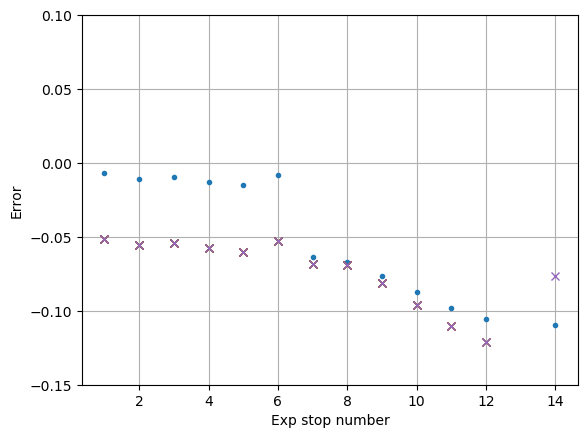

In [137]:
measuredt2td_1=np.array([42.1,50.3,60.2,70.8,79.2,89.8,90.5,92.8,95.1,97.8,101.8,104.8,106.8,101.7])/100
measuredt2td_3=np.array([43.5,53.5,63.2,71.8,81.9,92.8,95.5,95.4,94.6,94.3,95.2,97,7,94.5,86.4])/100
measuredt2td_4=np.array([41.6,51.2,62,72.7,82.7,92.4,94.9,97.6,100.7,104.1,108.0,107.4,105,97.4])/100

plt_exp(data1, m7e1, 0.26, prev_data1)
# plt_exp(prev_data1, m7e1, 0.27)
print("========================================")
plt_exp(data2, m7e2, 0.28, prev_data2)
# plt_exp(prev_data2, m7e2, 0.28)
print("========================================")
plt_exp(data3, m7e3, 0.276, prev_data3)
# plt_exp(prev_data3, m7e3, 0.276)
print("========================================")
plt_exp(data4, measuredt2td_1, 0.276, prev_data4)
# plt_exp(prev_data1, m7e1, 0.27)
print("========================================")
plt_exp(data6, measuredt2td_3, 0.275, prev_data6)
# plt_exp(prev_data2, m7e2, 0.28)
print("========================================")
# plt_exp(data6, measuredt2td_4, 0.276)
# # plt_exp(prev_data3, m7e3, 0.276)
# print("========================================")


In [104]:
data6

[array([-0.00517951, -0.16863502, -0.00076654]),
 array([-0.01124762, -0.27353321, -0.00124765]),
 array([-0.01536485, -0.36921962, -0.00221492]),
 array([-0.0192215 , -0.4590173 , -0.00301403]),
 array([-0.02577763, -0.56236671, -0.0024401 ]),
 array([-0.03191869, -0.66448646, -0.00274631]),
 array([-0.12041707, -0.73605629,  0.00105584]),
 array([-2.18503350e-01, -7.22113465e-01, -1.19974093e-04]),
 array([-3.11337573e-01, -6.99635324e-01, -7.22200604e-05]),
 array([-0.40137013, -0.67570315,  0.00074158]),
 array([-0.5016027 , -0.65009021,  0.00111503]),
 array([-5.91533261e-01, -6.26925023e-01,  3.90595525e-04]),
 array([-0.84494637, -0.46162948,  0.05728873]),
 array([-0.83246003, -0.37128537,  0.05776841])]

In [47]:
prev_data6

[(-0.005972851533442736, -0.20860885083675385, -0.0019763405434787273),
 (-0.012423515319824219, -0.3134973347187042, -0.002466633217409253),
 (-0.01660275086760521, -0.4091812074184418, -0.0034554419107735157),
 (-0.020546231418848038, -0.498978853225708, -0.004162519704550505),
 (-0.027238065376877785, -0.6023251414299011, -0.003531537251546979),
 (-0.0336904302239418, -0.7044308185577393, -0.0038904871325939894),
 (-0.1603965014219284, -0.7351061105728149, 0.00019447514205239713),
 (-0.2579163610935211, -0.7153366804122925, -0.0009504968184046447),
 (-0.3504636287689209, -0.6913630962371826, -0.0009219244820997119),
 (-0.44037696719169617, -0.6668980717658997, -0.0002264724171254784),
 (-0.5405206084251404, -0.6408932209014893, 0.00021388044115155935),
 (-0.6303784251213074, -0.6174105405807495, -0.00033592223189771175),
 (-0.8429762721061707, -0.421683669090271, 0.056617457419633865),
 (-0.8255473971366882, -0.33190199732780457, 0.05668873339891434)]

In [54]:
data6, prev_data6 = get_transformed_data(data_1)


[[-2.07913578e-02  9.99750173e-01  8.20429690e-03 -3.02106212e-03]
 [-9.97759205e-01 -2.02265796e-02 -6.37765965e-02 -1.99313581e-01]
 [-6.35947185e-02 -9.51191479e-03  9.97930476e-01  1.92887630e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-3.98115521e-02  9.99195020e-01  4.93487674e-03 -1.04429293e-02]
 [-9.97150798e-01 -3.94124404e-02 -6.43190962e-02 -3.83424729e-01]
 [-6.40728250e-02 -7.48145933e-03  9.97917181e-01  2.19076144e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-4.96810678e-02  9.98718768e-01  9.62364710e-03 -1.83883887e-02]
 [-9.96847291e-01 -4.89865282e-02 -6.24163314e-02 -5.82161248e-01]
 [-6.18649325e-02 -1.26942165e-02  9.98003801e-01 -3.74824158e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-0.06492791  0.99783     0.01093902 -0.0295952 ]
 [-0.99585485 -0.06409186 -0.06453954 -0.77012914]
 [-0.06369839 -0.01508409  0.99785519 -0.00114676]
 [ 0.          0.          0.          1

In [52]:
prev_data1

[(-0.003021062118932605, -0.19931358098983765, 0.0001928876299643889),
 (-0.010442929342389107, -0.3834247291088104, 0.00021907614427618682),
 (-0.01838838867843151, -0.5821612477302551, -0.0003748241579160094),
 (-0.02959519624710083, -0.7701291441917419, -0.0011467577423900366),
 (-0.2155490219593048, -0.8244122862815857, 0.0013787834905087948),
 (-0.28835153579711914, -0.6490427255630493, 0.0027866584714502096),
 (-0.16402602195739746, -0.4762798547744751, 2.974539529532194e-05),
 (-0.1492641568183899, -0.607599139213562, -0.00021677653421647847),
 (-0.23164506256580353, -0.7902112007141113, 3.6292167351348326e-05),
 (-0.3124358057975769, -0.9588727355003357, 0.000359248835593462),
 (-0.4015037715435028, -1.129913330078125, 0.0010399013990536332),
 (-0.4992305040359497, -1.3041331768035889, 0.0023712434340268373)]

In [53]:
data1

[array([-0.2013888 , -0.15236979,  0.00501714]),
 array([-0.20788238, -0.33268321,  0.0046592 ]),
 array([-0.21530741, -0.52952418,  0.0050093 ]),
 array([-0.22568089, -0.71452448,  0.00479255]),
 array([-0.15989731, -0.62829468,  0.00556516]),
 array([-0.08968409, -0.69489604,  0.00512595]),
 array([-0.24237515, -0.66443011,  0.00616562]),
 array([-0.32967985, -0.51263239,  0.0026549 ]),
 array([-0.39467163, -0.66776471,  0.00247526]),
 array([-0.47210239, -0.83210342,  0.00394735]),
 array([-0.55720481, -0.99830105,  0.00452496]),
 array([-0.65120035, -1.1682337 ,  0.00601156])]